ROHAN SARASWAT
PRN: 21070126071

**Calorie Prediction Using Various Machine Learning Models**

**DESCRIPTION**:

This project aims to predict the number of calories burned during physical activities using various machine learning algorithms. We perform a comparative analysis to evaluate the performance of different models and identify the most accurate method for calorie prediction.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
calorie= pd.read_csv("/content/drive/MyDrive/DATASETS/CalorieDetection/calories.csv")
exercise= pd.read_csv("/content/drive/MyDrive/DATASETS/CalorieDetection/exercise.csv")

In [ ]:
calorie.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


###### MERGING BOTH DATAS

In [ ]:
calorie_data= pd.concat([exercise, calorie['Calories']], axis=1)

In [ ]:
calorie_data.sample(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
4056,15600044,female,32,151.0,51.0,8.0,91.0,39.6,38.0
9234,14595307,female,27,171.0,64.0,8.0,89.0,39.6,34.0
10471,17919013,female,43,155.0,57.0,12.0,90.0,40.0,57.0
14594,10024532,male,34,171.0,68.0,14.0,87.0,40.5,43.0
296,19962170,female,32,156.0,56.0,23.0,113.0,40.5,161.0


In [ ]:
# Calculating the shape of data:
calorie_data.shape

(15000, 9)

In [ ]:
# Checking the columns data types:
calorie_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# Droping Unwanted Column:
data = calorie_data.drop('User_ID',axis=1)

In [ ]:
# Checking missing values:
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
# Data Mathmatical Relation:
data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
# Checking Dublicate Values:
data.duplicated().sum()

1

In [ ]:
data = data.drop_duplicates()

In [ ]:
# Checking Dublicate Values:
data.duplicated().sum()

0

In [ ]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# Checking corelation in the data:
# Converting Gender to numeric values: 0 for male, 1 for female
data_corr= data
data_corr['Gender_Numeric'] = data['Gender'].map({'male': 0, 'female': 1})
data_corr.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_Numeric
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


In [ ]:
data_corr = data_corr.drop('Gender',axis=1)

In [ ]:
data_corr.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_Numeric
0,68,190.0,94.0,29.0,105.0,40.8,231.0,0
1,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,69,179.0,79.0,5.0,88.0,38.7,26.0,0
3,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,27,154.0,58.0,10.0,81.0,39.8,35.0,1


In [ ]:
# Checking corelation on Target Column
data_corr.corr()['Calories']

Age               0.154356
Height            0.017499
Weight            0.035426
Duration          0.955419
Heart_Rate        0.897880
Body_Temp         0.824552
Calories          1.000000
Gender_Numeric   -0.022306
Name: Calories, dtype: float64

It states that as the Duration, Hert_Rate and Body_Temp increases, the Calories burnt increases.

Evaluating Outliers and Removing them.

In [ ]:
from scipy import stats

# Select numerical columns for outlier detection
numerical_columns = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data[numerical_columns]))

# Identify outliers (Z-score > 3)
outliers_zscore = np.where(z_scores > 3)

# Create a DataFrame to list outliers
outliers_zscore_df = data.iloc[outliers_zscore[0]]

outliers_zscore_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 301 to 14900
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          99 non-null     object 
 1   Age             99 non-null     int64  
 2   Height          99 non-null     float64
 3   Weight          99 non-null     float64
 4   Duration        99 non-null     float64
 5   Heart_Rate      99 non-null     float64
 6   Body_Temp       99 non-null     float64
 7   Calories        99 non-null     float64
 8   Gender_Numeric  99 non-null     int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 7.7+ KB


In [ ]:
from scipy import stats
import numpy as np

numerical_columns = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

z_scores = np.abs(stats.zscore(data[numerical_columns]))

# Identify outliers (Z-score > 3)
outlier_mask = (z_scores > 3).any(axis=1)

# Remove the outliers from the original data
cleaned_data = data[~outlier_mask]

# Display the info of the cleaned data to verify
cleaned_data.info()

# Show the first few rows of the cleaned data
cleaned_data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 14903 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          14903 non-null  object 
 1   Age             14903 non-null  int64  
 2   Height          14903 non-null  float64
 3   Weight          14903 non-null  float64
 4   Duration        14903 non-null  float64
 5   Heart_Rate      14903 non-null  float64
 6   Body_Temp       14903 non-null  float64
 7   Calories        14903 non-null  float64
 8   Gender_Numeric  14903 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_Numeric
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


In [ ]:
cleaned_data = cleaned_data.drop('Gender',axis=1)

In [ ]:
cleaned_data.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_Numeric
0,68,190.0,94.0,29.0,105.0,40.8,231.0,0
1,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,69,179.0,79.0,5.0,88.0,38.7,26.0,0
3,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,27,154.0,58.0,10.0,81.0,39.8,35.0,1


**EXPLORATORY** **DATA** **ANALYSIS**

**UNIVARIATE** **ANALYSIS**

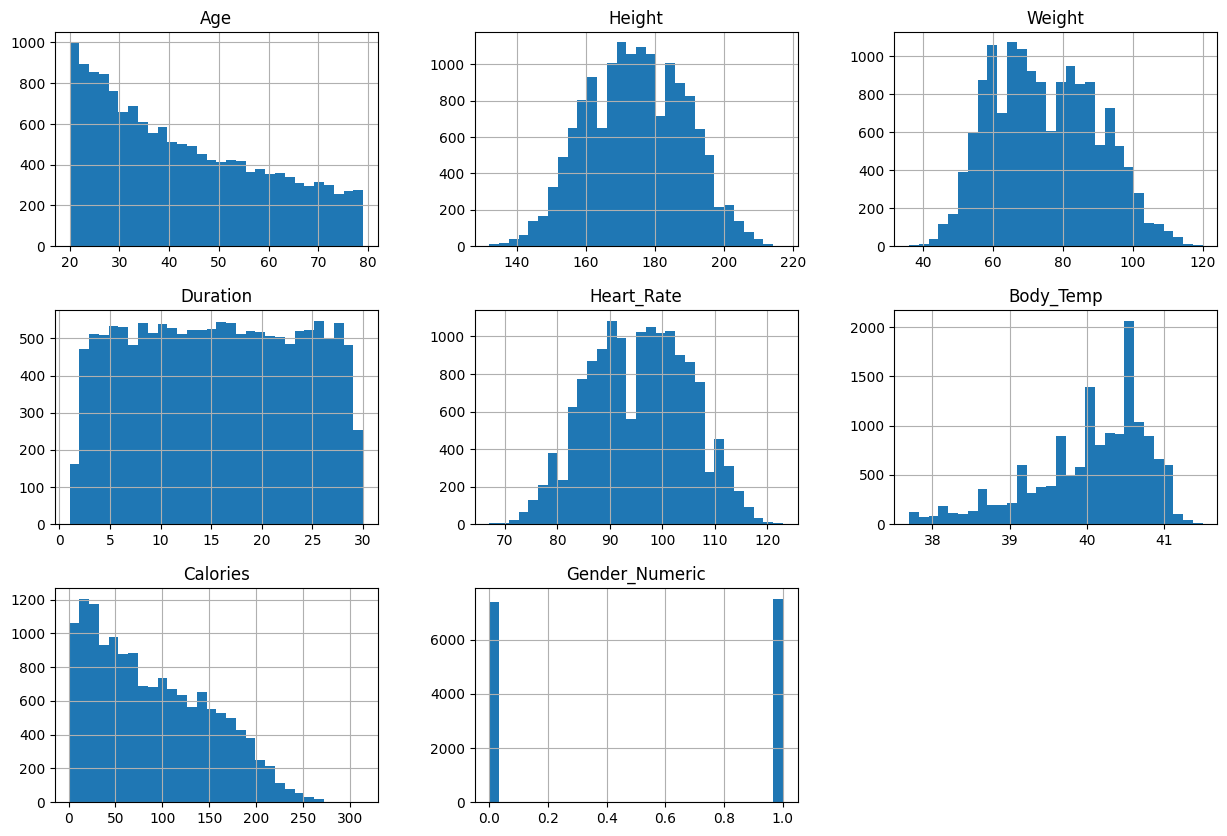

In [ ]:
import matplotlib.pyplot as plt
cleaned_data.hist(bins=30, figsize=(15, 10))
plt.show()


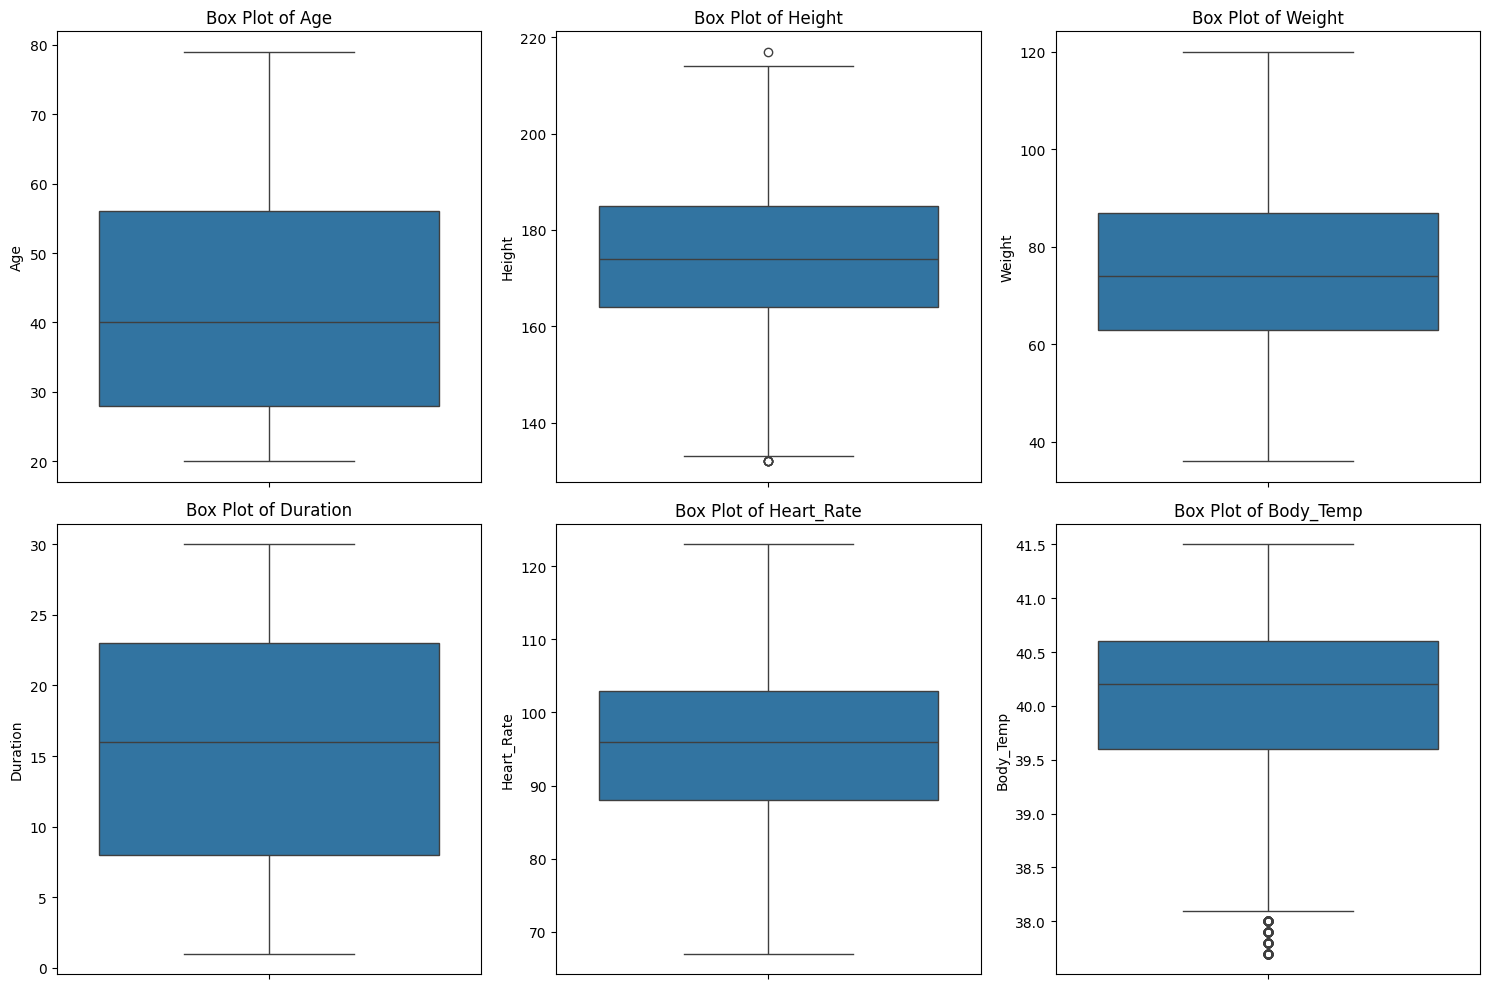

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=cleaned_data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


**BIVARIATE** **ANALYSIS**

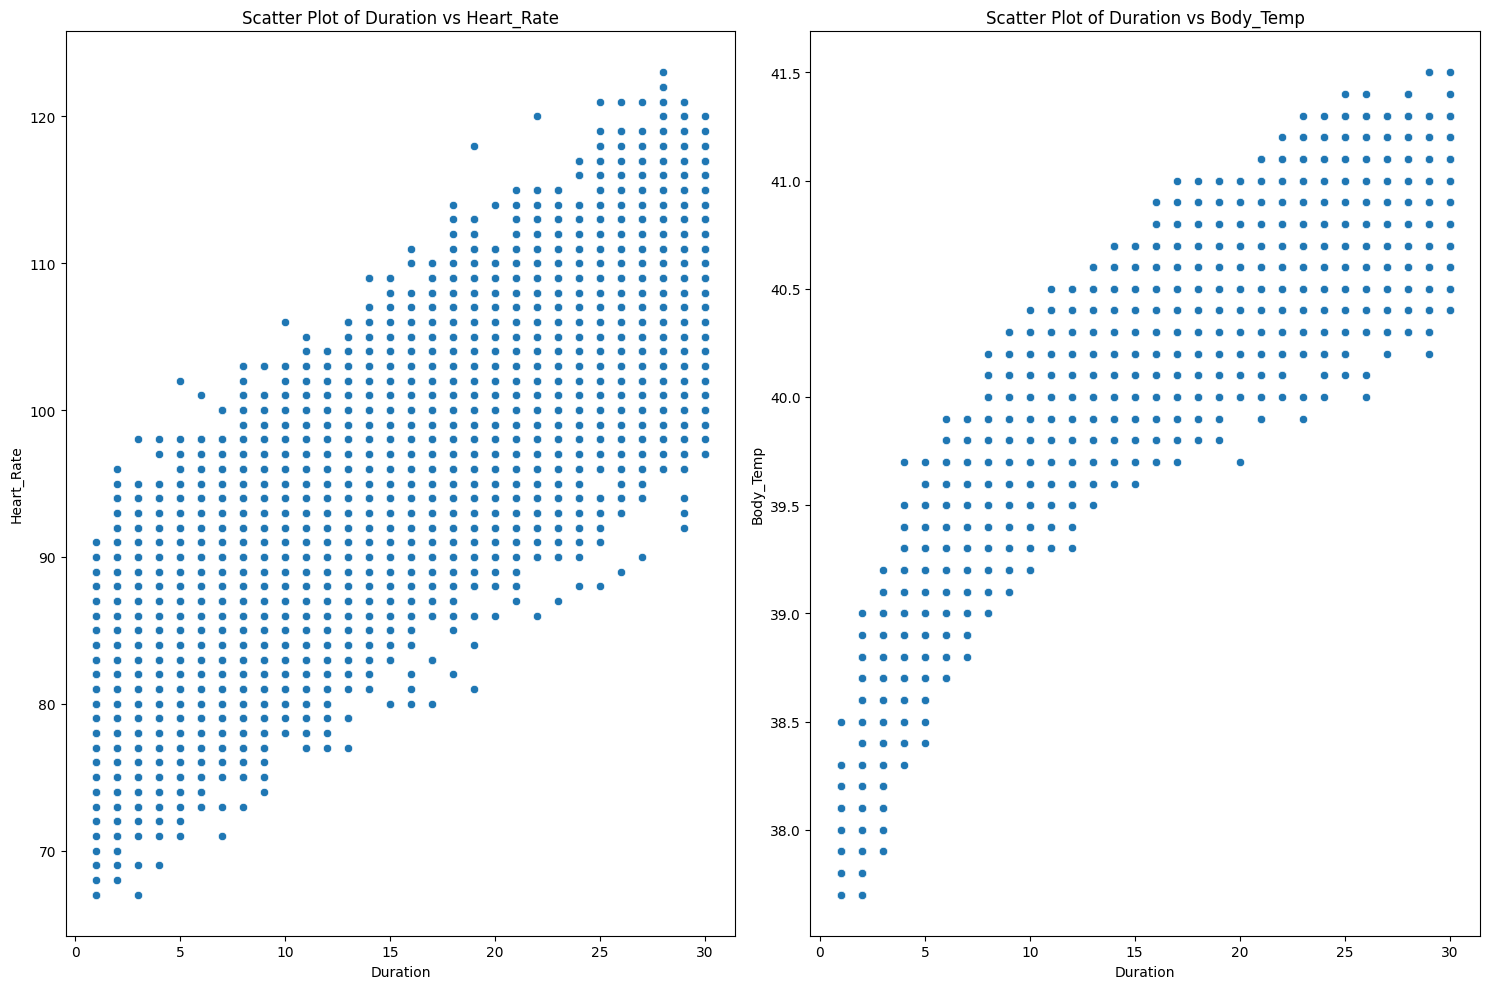

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Heart_Rate', 'Body_Temp'], 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(x=cleaned_data['Duration'], y=cleaned_data[col])
    plt.title(f'Scatter Plot of Duration vs {col}')
plt.tight_layout()
plt.show()


**CORELATION** **HEAT** **MAP**

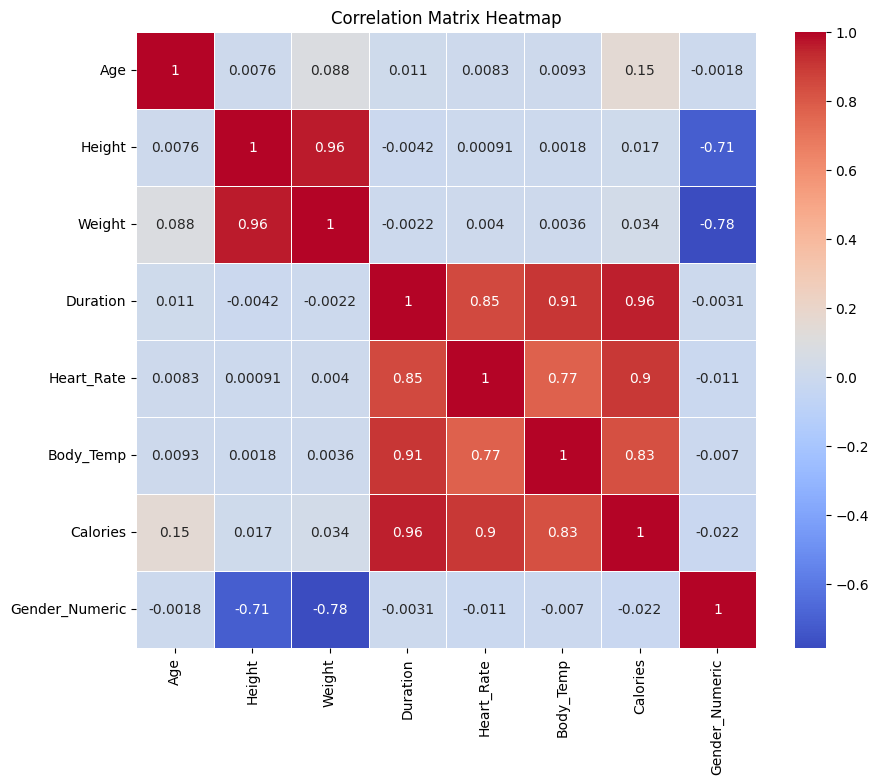

In [ ]:
correlation_matrix = cleaned_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


**PAIR** **PLOT**

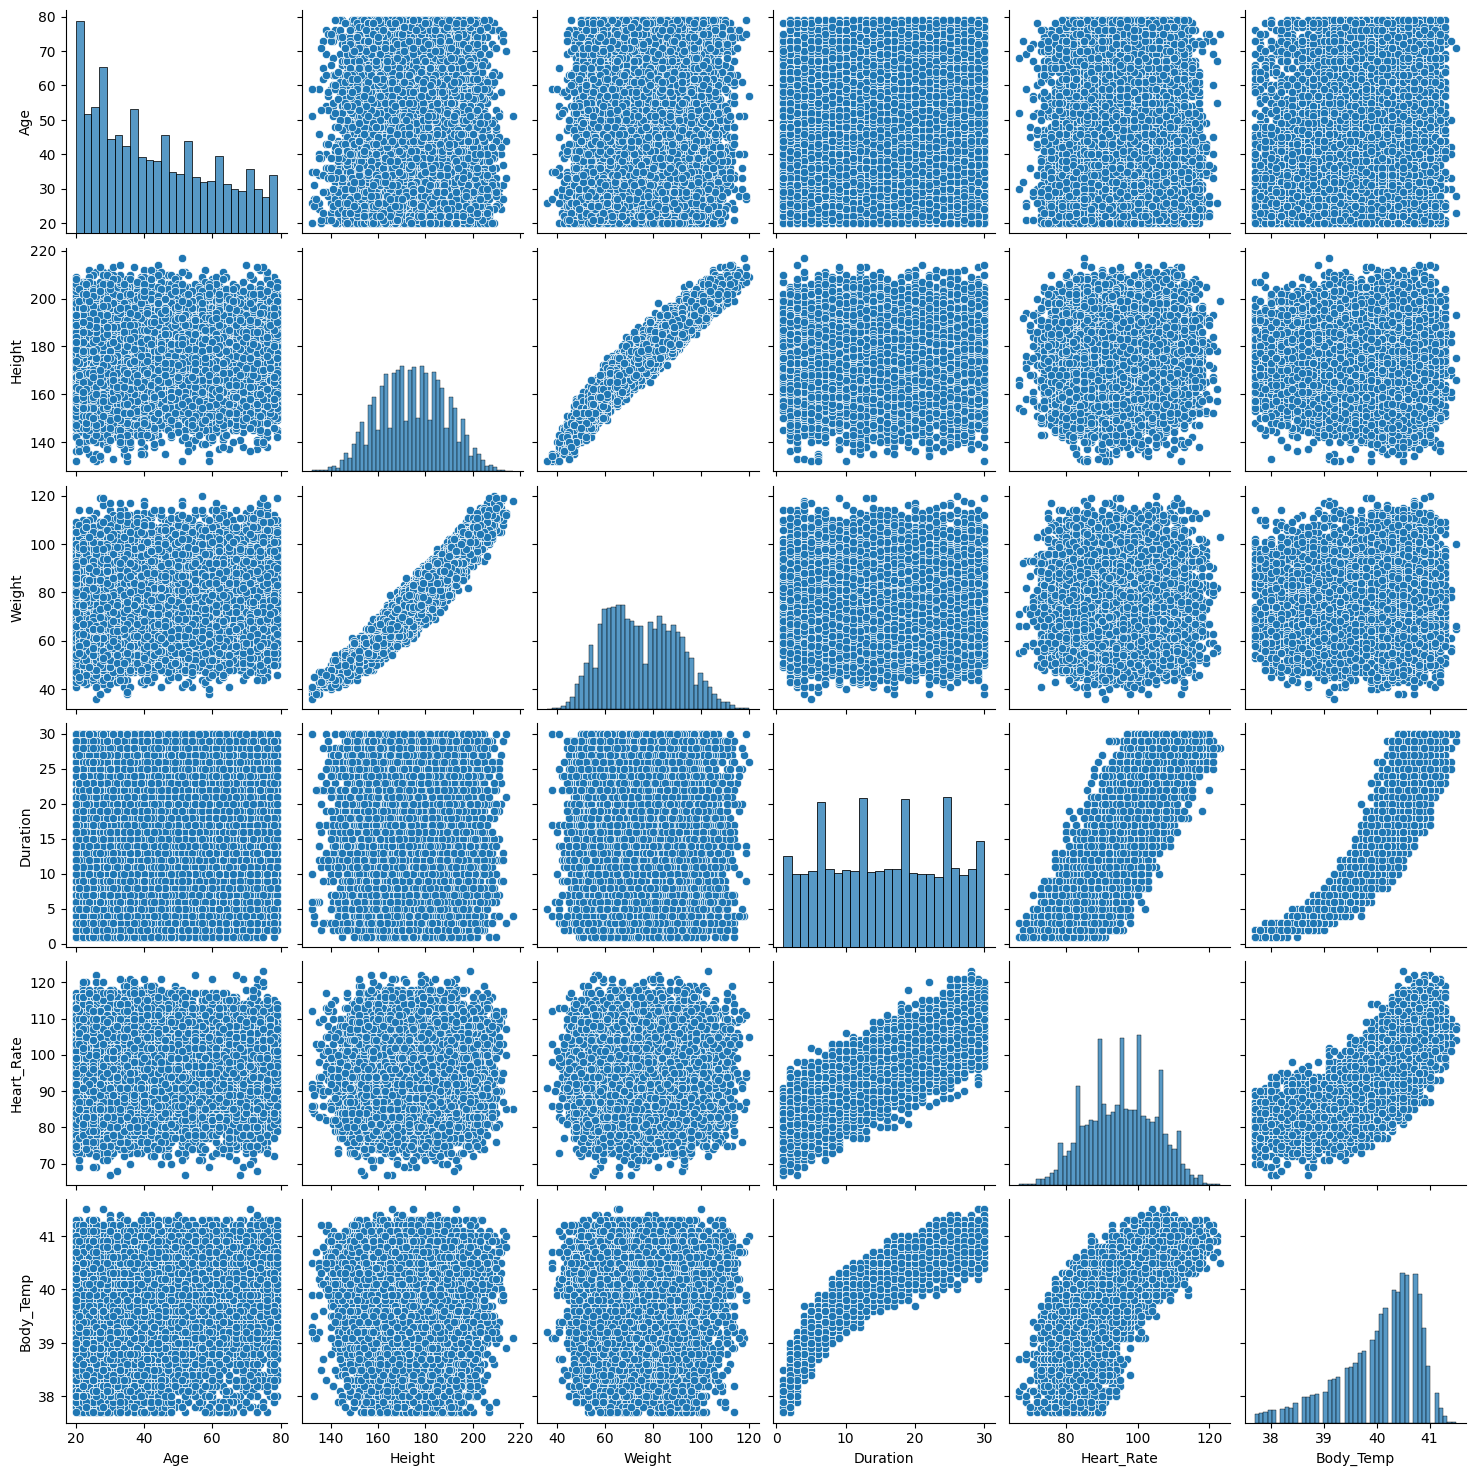

In [ ]:
sns.pairplot(cleaned_data[numerical_columns])
plt.show()


**Categorical** **Analysis**

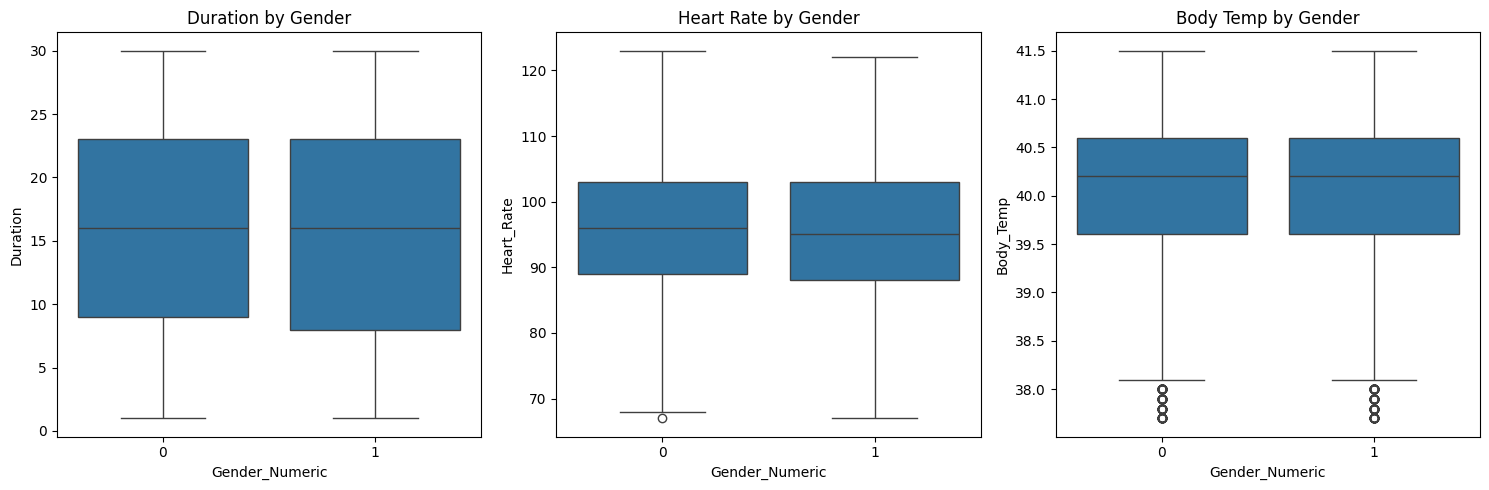

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Gender_Numeric', y='Duration', data=cleaned_data)
plt.title('Duration by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='Gender_Numeric', y='Heart_Rate', data=cleaned_data)
plt.title('Heart Rate by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='Gender_Numeric', y='Body_Temp', data=cleaned_data)
plt.title('Body Temp by Gender')

plt.tight_layout()
plt.show()


**Analysis By AGE**

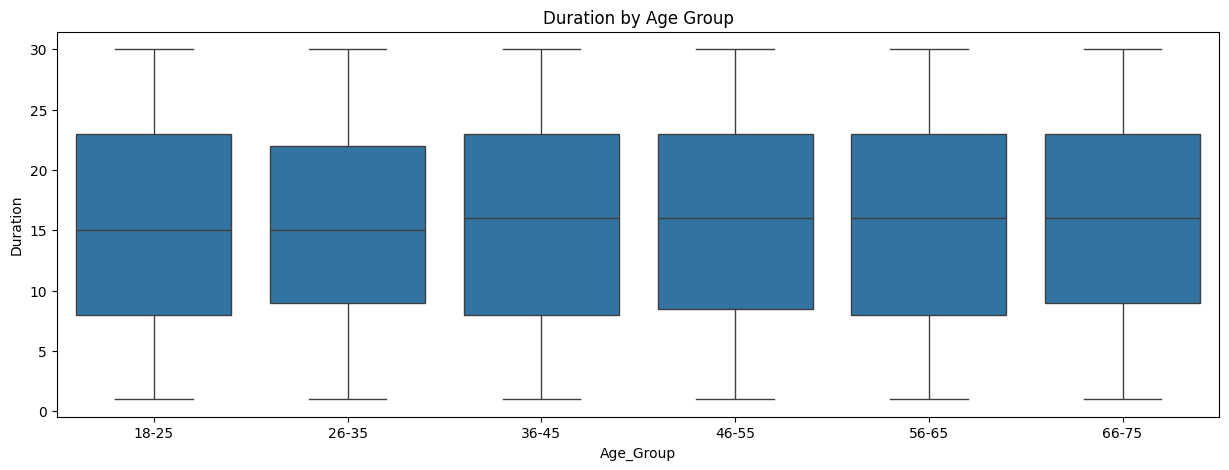

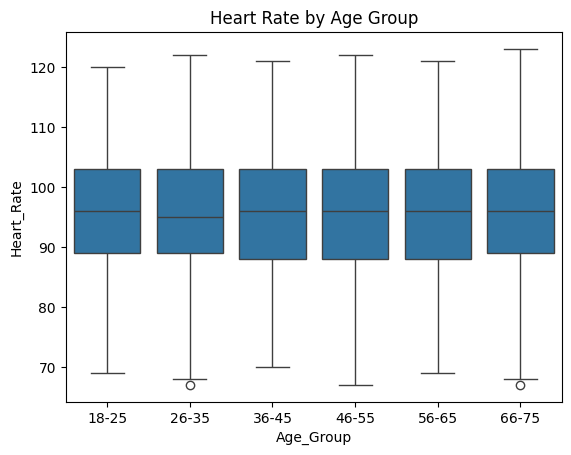

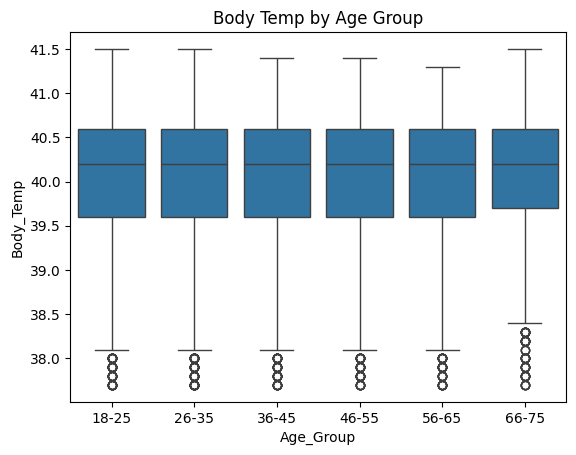

In [ ]:
cleaned_data['Age_Group'] = pd.cut(cleaned_data['Age'], bins=[18, 25, 35, 45, 55, 65, 75], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75'])

plt.figure(figsize=(15, 5))
sns.boxplot(x='Age_Group', y='Duration', data=cleaned_data)
plt.title('Duration by Age Group')
plt.show()

sns.boxplot(x='Age_Group', y='Heart_Rate', data=cleaned_data)
plt.title('Heart Rate by Age Group')
plt.show()

sns.boxplot(x='Age_Group', y='Body_Temp', data=cleaned_data)
plt.title('Body Temp by Age Group')
plt.show()


In [ ]:
cleaned_data = cleaned_data.drop('Age_Group',axis=1)

In [ ]:
cleaned_data.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_Numeric
0,68,190.0,94.0,29.0,105.0,40.8,231.0,0
1,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,69,179.0,79.0,5.0,88.0,38.7,26.0,0
3,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,27,154.0,58.0,10.0,81.0,39.8,35.0,1


COMPARATIVE ANALYSIS OF ALGORITHMS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Preprocess the data
X = cleaned_data.drop(columns=['Calories'])  # Assuming 'Calories' is the target variable
y = cleaned_data['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


,MAE,MSE,R2
Linear Regression,8.291052,126.120905,0.967655
Ridge Regression,8.290592,126.119560,0.967656
Lasso Regression,9.047807,151.137597,0.961239
Decision Tree,3.469306,28.753438,0.992626
Random Forest,1.743284,8.106994,0.997921
Gradient Boosting,2.545908,11.646971,0.997013
XGBoost,1.460183,4.300335,0.998897
Support Vector Regression,2.333730,31.699729,0.991870
KNN Regression,3.796914,27.092506,0.993052


from matplotlib import pyplot as plt
results_df['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['MSE'].plot(kind='hist', bins=20, title='MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['R2'].plot(kind='hist', bins=20, title='R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='MAE', y='MSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='MSE', y='R2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['MSE'].plot(kind='line', figsize=(8, 4), title='MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['R2'].plot(kind='line', figsize=(8, 4), title='R2')
plt.gca().spines[['top', 'right']].set_visible(False)

**LINEAR** **MODELS**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Models
def evaluate_linear_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso()
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "R2": r2_score(y_test, y_pred)
        }

    return results

# Evaluate linear models
linear_results = evaluate_linear_models(X_train_scaled, X_test_scaled, y_train, y_test)
pd.DataFrame(linear_results).T


,MAE,MSE,R2
Linear Regression,8.291052,126.120905,0.967655
Ridge Regression,8.290592,126.119560,0.967656
Lasso Regression,9.047807,151.137597,0.961239


**TREE** **BASED** **MODELS**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# Tree-Based Models
def evaluate_tree_based_models(X_train, X_test, y_train, y_test):
    models = {
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "XGBoost": xgb.XGBRegressor()
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "R2": r2_score(y_test, y_pred)
        }

    return results

# Evaluate tree-based models
tree_results = evaluate_tree_based_models(X_train_scaled, X_test_scaled, y_train, y_test)
pd.DataFrame(tree_results).T


,MAE,MSE,R2
Decision Tree,3.472325,28.996645,0.992564
Random Forest,1.771047,8.390907,0.997848
Gradient Boosting,2.545908,11.646971,0.997013
XGBoost,1.460183,4.300335,0.998897


**SUPPORT** **VECTOR** **REGRESSION**

In [ ]:
from sklearn.svm import SVR

# Support Vector Regression
def evaluate_svr(X_train, X_test, y_train, y_test):
    model = SVR()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

    return results

# Evaluate SVR
svr_results = evaluate_svr(X_train_scaled, X_test_scaled, y_train, y_test)
pd.DataFrame([svr_results], index=["SVR"])


,MAE,MSE,R2
SVR,2.33373,31.699729,0.99187


**K**-**Nearest** **Neighbors** **Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors Regression
def evaluate_knn(X_train, X_test, y_train, y_test):
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

    return results

# Evaluate KNN Regression
knn_results = evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test)
pd.DataFrame([knn_results], index=["KNN Regression"])


,MAE,MSE,R2
KNN Regression,3.796914,27.092506,0.993052


From our analysis, **XGBoost** get as the best-performing model with the lowest MAE and MSE, and the highest R-squared value. Tree-based ensemble methods like **Random Forest** and **Gradient Boosting** also performed exceptionally well.